In [1]:
from classifier_functions import *

In [2]:
DATA_LOC = "Original/data_injection_and_normal_events_dataset.csv"

In [4]:
df = dataset_preprocess(df)
df.head()


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,90.578898,130456.2238,-29.415653,129804.3188,-149.410204,130506.3704,88.986075,471.50825,-33.644082,486.15705,...,0,0,0,0,0,0,0,0,0,1
1,90.573168,130506.3704,-29.421383,129854.4653,-149.410204,130556.5169,88.951698,471.50825,-33.644082,485.79083,...,0,0,0,0,0,0,0,0,0,1
2,90.504413,130807.2496,-29.472949,130180.4178,-149.467500,130857.3961,88.367281,473.70557,-33.781592,484.69217,...,0,0,0,0,0,0,0,0,0,1
3,90.429929,130932.6159,-29.553163,130330.8575,-149.536255,131007.8358,87.782864,476.26911,-33.970668,485.05839,...,0,0,0,0,0,0,0,0,0,1
4,90.378363,130982.7625,-29.610459,130355.9307,-149.599280,131057.9823,87.433360,477.73399,-34.068071,485.24150,...,0,0,0,0,0,0,0,0,0,1


In [8]:
train_df, test_df = training_testing_split(df, testing_split=0.3)

In [11]:
train_df, label_train_df = data_label_split(train_df)

C:\Users\ajayr\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
test_df, label_test_df = data_label_split(test_df)

C:\Users\ajayr\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Random Forest


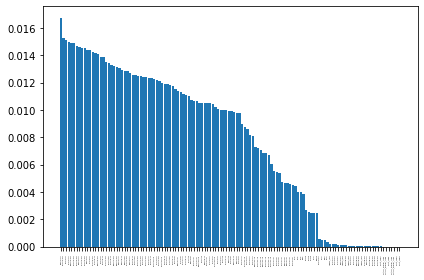

Training time = 21.2s
Testing time = 0.27s
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6795
           1       0.93      0.78      0.85      2894

    accuracy                           0.92      9689
   macro avg       0.92      0.88      0.89      9689
weighted avg       0.92      0.92      0.91      9689

Total TPs: 6622 FNs: 173 FPs: 646 TNs: 2248
Rates TP: 0.975 FN: 0.025 FP: 0.223 TN: 0.777
roc auc score: 0.972


In [17]:
rf = training(train_df, label_train_df, classifier="Random Forest")
testing(test_df, label_test_df, rf)

In [18]:
svm = training(train_df, label_train_df, classifier="SVM")
testing(test_df, label_test_df, svm)

SVM
Training time = 345.43s
Testing time = 13.8s
              precision    recall  f1-score   support

           0       0.70      0.99      0.82      6795
           1       0.49      0.02      0.05      2894

    accuracy                           0.70      9689
   macro avg       0.60      0.51      0.43      9689
weighted avg       0.64      0.70      0.59      9689

Total TPs: 6723 FNs: 72 FPs: 2825 TNs: 69
Rates TP: 0.989 FN: 0.011 FP: 0.976 TN: 0.024
roc auc skipped


In [19]:
lr = training(train_df, label_train_df, classifier="Logistic Regression")
testing(test_df, label_test_df, lr)

Logistic Regression
Training time = 0.64s
Testing time = 0.02s
              precision    recall  f1-score   support

           0       0.70      0.99      0.82      6795
           1       0.41      0.01      0.02      2894

    accuracy                           0.70      9689
   macro avg       0.56      0.50      0.42      9689
weighted avg       0.62      0.70      0.58      9689

Total TPs: 6761 FNs: 34 FPs: 2870 TNs: 24
Rates TP: 0.995 FN: 0.005 FP: 0.992 TN: 0.008
roc auc score: 0.594


C:\Users\ajayr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
nb = training(train_df, label_train_df, classifier="Naive Bayes")
testing(test_df, label_test_df, nb)

Naive Bayes
Training time = 0.08s
Testing time = 0.02s
              precision    recall  f1-score   support

           0       0.70      0.98      0.82      6795
           1       0.33      0.03      0.05      2894

    accuracy                           0.69      9689
   macro avg       0.51      0.50      0.43      9689
weighted avg       0.59      0.69      0.59      9689

Total TPs: 6630 FNs: 165 FPs: 2814 TNs: 80
Rates TP: 0.976 FN: 0.024 FP: 0.972 TN: 0.028
roc auc score: 0.577


In [21]:
knn = training(train_df, label_train_df, classifier="KNN")
testing(test_df, label_test_df, knn)

KNN
Training time = 0.02s
Testing time = 10.02s
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      6795
           1       0.71      0.56      0.63      2894

    accuracy                           0.80      9689
   macro avg       0.77      0.73      0.74      9689
weighted avg       0.79      0.80      0.79      9689

Total TPs: 6118 FNs: 677 FPs: 1267 TNs: 1627
Rates TP: 0.9 FN: 0.1 FP: 0.438 TN: 0.562
roc auc score: 0.851


In [22]:
dt = training(train_df, label_train_df, classifier="Decision Tree")
testing(test_df, label_test_df, dt)

Decision Tree
Training time = 1.01s
Testing time = 0.02s
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      6795
           1       1.00      0.02      0.04      2894

    accuracy                           0.71      9689
   macro avg       0.85      0.51      0.43      9689
weighted avg       0.79      0.71      0.59      9689

Total TPs: 6795 FNs: 0 FPs: 2833 TNs: 61
Rates TP: 1.0 FN: 0.0 FP: 0.979 TN: 0.021
roc auc score: 0.59


In [23]:
ada = training(train_df, label_train_df, classifier="AdaBoost")
testing(test_df, label_test_df, ada)

AdaBoost
Training time = 16.34s
Testing time = 0.47s
              precision    recall  f1-score   support

           0       0.72      0.96      0.82      6795
           1       0.55      0.12      0.20      2894

    accuracy                           0.71      9689
   macro avg       0.63      0.54      0.51      9689
weighted avg       0.67      0.71      0.63      9689

Total TPs: 6509 FNs: 286 FPs: 2546 TNs: 348
Rates TP: 0.958 FN: 0.042 FP: 0.88 TN: 0.12
roc auc score: 0.681


In [24]:
gb = training(train_df, label_train_df, classifier="Gradient Boosting")
testing(test_df, label_test_df, gb)

Gradient Boosting
Training time = 81.45s
Testing time = 0.08s
              precision    recall  f1-score   support

           0       0.72      0.98      0.83      6795
           1       0.77      0.12      0.21      2894

    accuracy                           0.73      9689
   macro avg       0.75      0.55      0.52      9689
weighted avg       0.74      0.73      0.65      9689

Total TPs: 6689 FNs: 106 FPs: 2538 TNs: 356
Rates TP: 0.984 FN: 0.016 FP: 0.877 TN: 0.123
roc auc score: 0.752


In [25]:
bag = training(train_df, label_train_df, classifier="Bagging")
testing(test_df, label_test_df, bag)


Bagging
Training time = 326.02s
Testing time = 253.91s
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      6795
           1       0.00      0.00      0.00      2894

    accuracy                           0.70      9689
   macro avg       0.35      0.50      0.41      9689
weighted avg       0.49      0.70      0.58      9689

Total TPs: 6795 FNs: 0 FPs: 2894 TNs: 0
Rates TP: 1.0 FN: 0.0 FP: 1.0 TN: 0.0


C:\Users\ajayr\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayr\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajayr\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


roc auc score: 0.507
